A function that applies a median filter of the given size to the input image, img. Basic
process: For each window: extract the pixel neighborhood, sort the values, replace the
center pixel with the median value.


In [40]:
import cv2 as cv

def get_image_for_plotting(path):
    img = cv.imread(path)
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    return img

In [41]:
import numpy as np

def median_filter(img, size=3):
    # Find how much padding should be added
    k = size // 2
    # Add padding of 0
    g_pad = np.pad(img, k)
    h, w = img.shape
    # Create output image array
    out = np.empty_like(img)

    # Go through all pixels of the image
    for y in range(h):
        for x in range(w):
            # Select SizexSize window
            window = g_pad[y:y+size, x:x+size]
            
            #Set out pixel to median
            out[y, x] = np.median(window)
    return out.astype(img.dtype)

In [42]:
img = get_image_for_plotting("./images/salt_and_pepper_noise.png")

img_w_median_applied = median_filter(img, 3)

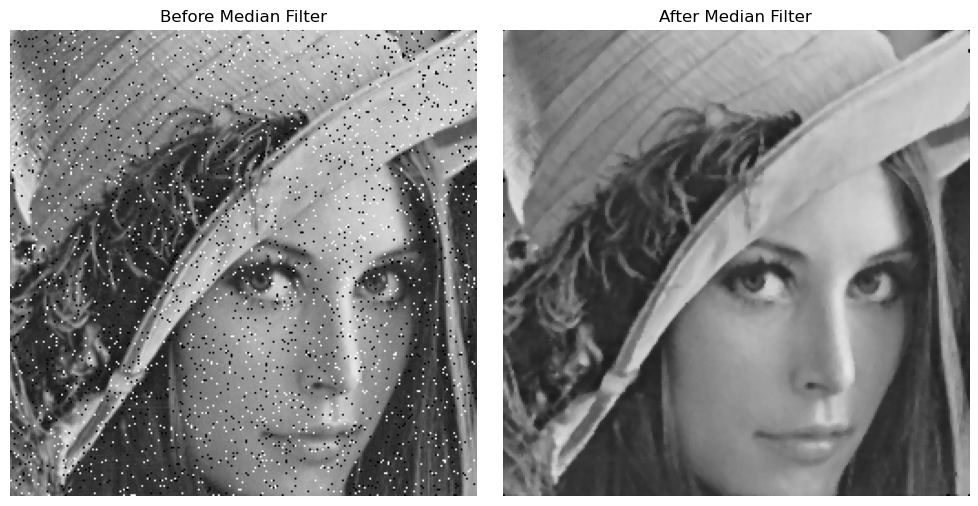

In [43]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(img, cmap='gray', vmin=0, vmax=255)
ax[0].set_title("Before Median Filter")
ax[0].axis('off')

ax[1].imshow(img_w_median_applied, cmap='gray', vmin=0, vmax=255)
ax[1].set_title("After Median Filter")
ax[1].axis('off')

plt.tight_layout()
plt.savefig("./images/output_median_filter")

In [46]:
import math

def apply_convolution(img: np.ndarray, kernel: np.ndarray) -> np.ndarray:
    k = kernel.shape[0]
    r = k // 2

    # Pad the image with edges meaning we have a padding of r pixels on each side
    padded = np.pad(img, ((r, r), (r, r)))
    H, W = img.shape
    out = np.zeros((H, W), dtype=np.float32)
    ker = kernel.astype(np.float32)

    for y in range(H):
        for x in range(W):
            acc = 0.0
            for j in range(-r, r+1):
                for i in range(-r, r+1):
                    acc += float(padded[y + j + r, x + i + r]) * float(ker[j + r, i + r])
            out[y, x] = acc
    
    return out

sobel_x = np.array([[-1,-2,-1],
                    [ 0, 0, 0],
                    [ 1, 2, 1]], dtype=np.float32)
                             
sobel_y = np.array([[-1,0,1],
                    [-2,0,2],
                    [-1,0,1]], dtype=np.float32)

def calculate_gradient(img):
    sobel_x_img = apply_convolution(img, sobel_x)
    sobel_y_img = apply_convolution(img, sobel_y)

    H, W = sobel_x_img.shape
    # Output image array
    mag = np.empty((H, W), dtype=np.float32)

    # Go through every pixel
    for y in range(H):
        for x in range(W):
            gx = float(sobel_x_img[y, x])
            gy = float(sobel_y_img[y, x])
            mag[y, x] = math.sqrt(gx*gx + gy*gy)
    return mag



In [50]:
mag_img = calculate_gradient(img)
median_on_mag = median_filter(mag_img, 3)

mag_on_median = calculate_gradient(img_w_median_applied)

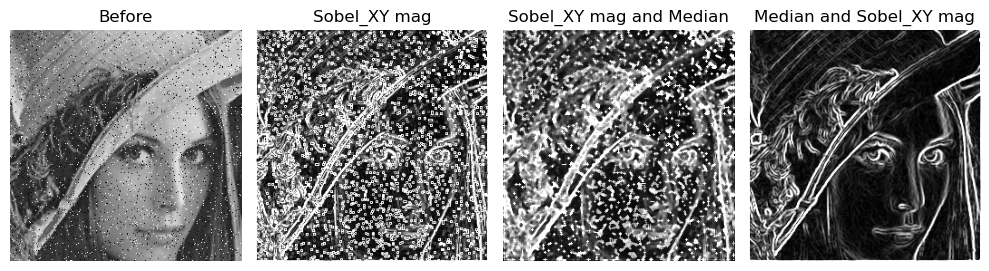

In [51]:
fig, ax = plt.subplots(1, 4, figsize=(10, 5))

ax[0].imshow(img, cmap='gray', vmin=0, vmax=255)
ax[0].set_title("Before")
ax[0].axis('off')

ax[1].imshow(mag_img, cmap='gray', vmin=0, vmax=255)
ax[1].set_title("Sobel_XY mag")
ax[1].axis('off')

ax[2].imshow(median_on_mag, cmap='gray', vmin=0, vmax=255)
ax[2].set_title("Sobel_XY mag and Median")
ax[2].axis('off')

ax[3].imshow(mag_on_median, cmap='gray', vmin=0, vmax=255)
ax[3].set_title("Median and Sobel_XY mag")
ax[3].axis('off')

plt.tight_layout()
plt.savefig("./images/output_sobels")